<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

In [444]:
# Imports:
import numpy as np
import scipy
from scipy.stats import linregress
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import csv
import seaborn as sns
from datetime import datetime

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

## Problem Statement

The goal of this project is to analyze trends in SAT scores among test takers from 2017 to 2019. Our hypothesis will be, in general, that although participation levels increased in the SATs from 2017 to 2019, test scores decreased slightly across these years in all areas. In other words, these two variables were negatively correlated and a linear regression line may be observed across these years. Additionally, we will observe trends in 2019 scores among intended majors and perform statistical analysis methods to to analyze various features of these scores, asserting that those in intended majors relevant to test subjects performed better in those areas, and those with non-academic intended majors, in general, performed under the average of 2019 general SAT standards. 

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

The SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections)). The ACT has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section ([*source*](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)). They have different score ranges, which you can read more about on their websites or additional outside sources (a quick Google search will help you understand the scores for each test):
* [SAT](https://collegereadiness.collegeboard.org/sat)
* [ACT](https://www.act.org/content/act/en.html)

Standardized tests have long been a controversial topic for students, administrators, and legislators. Since the 1940's, an increasing number of colleges have been using scores from sudents' performances on tests like the SAT and the ACT as a measure for college readiness and aptitude ([*source*](https://www.minotdailynews.com/news/local-news/2017/04/a-brief-history-of-the-sat-and-act/)). Supporters of these tests argue that these scores can be used as an objective measure to determine college admittance. Opponents of these tests claim that these tests are not accurate measures of students potential or ability and serve as an inequitable barrier to entry. Lately, more and more schools are opting to drop the SAT/ACT requirement for their Fall 2021 applications ([*read more about this here*](https://www.cnn.com/2020/04/14/us/coronavirus-colleges-sat-act-test-trnd/index.html)).

**To-Do:** *Fill out this cell (or edit the above cell) with any other background or information that is necessary for your problem statement.*

### Choose your Data

There are 10 datasets included in the [`data`](./data/) folder for this project. You are required to pick **at least two** of these to complete your analysis. Feel free to use more than two if you would like, or add other relevant datasets you find online.

* [`act_2017.csv`](./data/act_2017.csv): 2017 ACT Scores by State
* [`act_2018.csv`](./data/act_2018.csv): 2018 ACT Scores by State
* [`act_2019.csv`](./data/act_2019.csv): 2019 ACT Scores by State
* [`act_2019_ca.csv`](./data/act_2019_ca.csv): 2019 ACT Scores in California by School
* [`sat_2017.csv`](./data/sat_2017.csv): 2017 SAT Scores by State
* [`sat_2018.csv`](./data/sat_2018.csv): 2018 SAT Scores by State
* [`sat_2019.csv`](./data/sat_2019.csv): 2019 SAT Scores by State
* [`sat_2019_by_intended_college_major.csv`](./data/sat_2019_by_intended_college_major.csv): 2019 SAT Scores by Intended College Major
* [`sat_2019_ca.csv`](./data/sat_2019_ca.csv): 2019 SAT Scores in California by School
* [`sat_act_by_college.csv`](./data/sat_act_by_college.csv): Ranges of Accepted ACT & SAT Student Scores by Colleges

**To-Do:** *Fill out this cell with the datasets you will use for your analysis. Write a brief description of the contents for each dataset that you choose.*

### Outside Research

Based on your problem statement and your chosen datasets, spend some time doing outside research on state policies or additional information that might be relevant. Summarize your findings below. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. **Make sure that you cite your sources.**

**To-Do:** *Fill out this cell with outside research or any additional background information that will support your analysis.*

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [445]:
# Code:
mean_list = [1,2,3,4]
def my_mean(m): return sum(m)/len(m)

In [446]:
my_mean(mean_list)

2.5

In [447]:
#Confirmed, it works.

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [448]:
# Code:
def my_var(m): 
    vari = (sum((m - np.mean(m))**2))/(len(m)-1)
    return vari

In [449]:
my_var(mean_list)

1.6666666666666667

In [450]:
def my_std(m): return my_var(m)**0.5

In [451]:
my_std(mean_list)

1.2909944487358056

In [452]:
#Confirmed, it works.

In [453]:
#Bonus: 
def my_std_err(m): return my_std(m)/((len(m))**0.5)

In [454]:
my_std_err(mean_list)

0.6454972243679028

3. Data cleaning function:
    
    Write a function that takes in a string that is a number and a percent symbol (ex. '50%', '30.5%', etc.) and converts this to a float that is the decimal approximation of the percent. For example, inputting '50%' in your function should return 0.5, '30.5%' should return 0.305, etc. Make sure to test your function to make sure it works!

You will use these functions later on in the project!

In [455]:
def per_to_dec(percent_str):
    try:
        # Remove the '%' symbol convert to float
        percent_to_dec = float(str(percent_str).rstrip('%'))

        # Convert the percentage float to a decimal by dividing by 100
        decimal = percent_to_dec / 100.0

        return decimal

    except ValueError:
        # Handle the case where the input is not a valid number with '%' symbol
        print("Error: Invalid input. Please provide a valid percentage string.")
        return None

In [456]:
per_to_dec('30.5%')

0.305

In [457]:
#Confirmed, it works. 

In [458]:
def comma_drop(int_str):
    try:
        # Remove the ',' from string and convert to float
        comma_drop_value = float(str(int_str).replace(',',''))

        return comma_drop_value

    except ValueError:
        # Handle the case where the input is not a valid number with '%' symbol
        print("Error: Invalid input. Please provide a valid integer string.")
        return None

In [459]:
comma_drop('12,333')

12333.0

In [460]:
#Confirmed, it works. 

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

## Data Import and Cleaning

### Data Import & Cleaning

Import the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary:
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values.
3. Check for any obvious issues with the observations (keep in mind the minimum & maximum possible values for each test/subtest).
4. Fix any errors you identified in steps 2-3.
5. Display the data types of each feature.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If your dataset has a column of percents (ex. '50%', '30.5%', etc.), use the function you wrote in Part 1 (coding challenges, number 3) to convert this to floats! *Hint*: use `.map()` or `.apply()`.
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

In [461]:
# Thesis: SAT scores have improved over 3 years and SAT scores are better in areas by intended college major (i.e. math major better at math etc.etc.)
#Step 0: Import (DONE) 
sat17 = pd.read_csv('/Users/ben/Desktop/DSI_GA_Materials/project_1/data/sat_2017.csv')
sat18 = pd.read_csv('/Users/ben/Desktop/DSI_GA_Materials/project_1/data/sat_2018.csv')
sat19 = pd.read_csv('/Users/ben/Desktop/DSI_GA_Materials/project_1/data/sat_2019.csv')
sat19maj = pd.read_csv('/Users/ben/Desktop/DSI_GA_Materials/project_1/data/sat_2019_by_intended_college_major.csv')

In [462]:
#Step 1: Display (DONE) 
sat17.head(5);

In [463]:
sat18;

In [464]:
rows_to_drop = [39,47]  # Replace with the actual indices you want to drop

# Drop the specified rows
sat19_dropped = sat19.drop(rows_to_drop)

# Display the updated DataFrame
sat19_dropped;

In [465]:
sat19_reset = sat19_dropped.iloc[0:52].reset_index(drop=True)

# Display the updated DataFrame
sat19_reset;


# sat19_dropped.iloc[0:50].reset_index(drop=True, inplace=True)

# # Display the updated DataFrame
# sat19_dropped

In [466]:
sat19maj.tail(5)

,IntendedCollegeMajor,TestTakers,Percent,Total,ReadingWriting,Math
33,Theology and Religious Vocations,"1,991",0%,1096,561,535
34,Transportation and Materials Moving,"1,105",0%,1019,511,508
35,"Visual and Performing Arts, General","130,642",7%,1045,536,510
36,Other,"26,888",1%,963,488,476
37,Undecided,"126,939",7%,1069,538,532


In [467]:
#Step 2: Display missing values (DONE) 
sat19maj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   IntendedCollegeMajor  38 non-null     object
 1   TestTakers            38 non-null     object
 2   Percent               38 non-null     object
 3   Total                 38 non-null     int64 
 4   ReadingWriting        38 non-null     int64 
 5   Math                  38 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 1.9+ KB


In [468]:
# None have null values

In [469]:
#Step 3: No observational issues (DONE) 
#Step 4: No errors to fix? (DONE) 
#Step 5: Data type display: From info() we get 2 strings, 3 int64s for sat17, sat18, sat19 and 3 strings, int64 for sat19maj. (DONE) 
sat19.dtypes
#Step 6: Change `Evidence-Based Reading and Writing` to `EBRW` in files sat17, sat18 (DONE)
# Rename `Participation Rate` to `Participation` in sat19 (DONE)
# Include Puerto Rico and Virgin Islands in sat19 file...decide whether to exclude? less than 1% took the exam so I excluded as outliers. (DONE)
#Convert the percentages to decimal values in all files (DONE) AND Change `,`s out of TestTakers column in the sat19maj file (DONE)

State                 object
Participation Rate    object
EBRW                   int64
Math                   int64
Total                  int64
dtype: object

In [470]:
sat17.iloc[0:51,1:2];

In [471]:
sat17.iloc[0:51, 1:2] = sat17.iloc[0:51, 1:2].map(per_to_dec)
sat17.iloc[0:51, 1:2];

In [472]:
sat17.columns

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')

In [473]:
sat19maj.columns

Index(['IntendedCollegeMajor', 'TestTakers', 'Percent', 'Total',
       'ReadingWriting', 'Math'],
      dtype='object')

In [474]:
sat17.rename(columns={'Evidence-Based Reading and Writing': 'EBRW'}, inplace=True)
sat17;

In [475]:
sat18.rename(columns={'Evidence-Based Reading and Writing': 'EBRW'}, inplace=True)
sat18;

In [476]:
sat18.iloc[0:51, 1:2] = sat18.iloc[0:51, 1:2].map(per_to_dec)
sat18.iloc[0:51, 1:2];

In [477]:
sat18;

In [478]:
sat19_reset.iloc[0:51, 1:2] = sat19_reset.iloc[0:51, 1:2].map(per_to_dec)
sat19_reset.iloc[0:51, 1:2];

In [479]:
sat19_reset.rename(columns={'Participation Rate': 'Participation'}, inplace=True)
sat19_reset;

In [480]:
sat19maj.iloc[0:39, 2:3] = sat19maj.iloc[0:39, 2:3].map(per_to_dec)
sat19maj;

In [481]:
sat19maj.iloc[0:39, 1:2] = sat19maj.iloc[0:39, 1:2].map(comma_drop)
sat19maj;

In [482]:
#Step 7: Rename Columns to all lowercase and remove spaces (In process)
# Spaces removed (DONE) 
# Lowercase
# df.columns = df.columns.str.lower()
sat17.columns = sat17.columns.str.lower()
sat17;
sat18.columns = sat18.columns.str.lower()
sat18;
sat19_reset.columns = sat19_reset.columns.str.lower()
sat19_reset;
sat19maj.columns = sat19maj.columns.str.lower()
sat19maj;

In [483]:
#Step 8: Drop unnecessary rows (if needed) (DONE) (Already completed in previous step: PR and VI)
#Step 9: Merge dataframes that can be merged (DONE) (None need merging at the moment at least) (Revisit later potentially)
#Step 10: Perform any additional cleaning that you feel is necessary (DONE) (No further cleaning necessary)
#Step 11: Convert back to csv files (DONE)

In [484]:
# Generate a timestamp for the unique file name
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Create a unique file name with the timestamp
file_name = f'output_file_{timestamp}.csv'

In [485]:
# sat17.to_csv('/Users/ben/Desktop/DSI_GA_Materials/project_1/data/SAT_2017_NEW.csv', index=True)
# sat18.to_csv('/Users/ben/Desktop/DSI_GA_Materials/project_1/data/SAT_2018_NEW.csv', index=True)
# sat19_reset.to_csv('/Users/ben/Desktop/DSI_GA_Materials/project_1/data/SAT_2019_RESET_NEW.csv', index=True)
# sat19maj.to_csv('/Users/ben/Desktop/DSI_GA_Materials/project_1/data/SAT_2019_MAJ_NEW.csv', index=True)

### Data Dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

*Note*: if you are unsure of what a feature is, check the source of the data! This can be found in the README.

**To-Do:** *Edit the table below to create your own data dictionary for the datasets you chose.*

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


## Exploratory Data Analysis

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which states have the highest and lowest participation rates for the 2017, 2019, or 2019 SAT and ACT?
        - Which states have the highest and lowest mean total/composite scores for the 2017, 2019, or 2019 SAT and ACT?
        - Do any states with 100% participation on a given test have a rate change year-to-year?
        - Do any states show have >50% participation on *both* tests each year?
        - Which colleges have the highest median SAT and ACT scores for admittance?
        - Which California school districts have the highest and lowest mean test scores?
    - **You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [486]:
sat17_edited = pd.read_csv('/Users/ben/Desktop/DSI_GA_Materials/project_1/data/SAT_2017_NEW.csv')
sat18_edited = pd.read_csv('/Users/ben/Desktop/DSI_GA_Materials/project_1/data/SAT_2018_NEW.csv')
sat19_edited = pd.read_csv('/Users/ben/Desktop/DSI_GA_Materials/project_1/data/SAT_2019_RESET_NEW.csv')
sat19maj_edited = pd.read_csv('/Users/ben/Desktop/DSI_GA_Materials/project_1/data/SAT_2019_MAJ_NEW.csv')

In [487]:
sat17_edited.describe();

In [488]:
my_std_err(sat17_edited['total'])

12.951864273470463

In [489]:
my_std(sat17_edited['ebrw'])

45.66690138768932

In [490]:
my_std(sat17_edited['math'])

84.90911865855486

In [491]:
my_std(sat17_edited['total'])

92.49481172519046

In [492]:
# Dictionary comprehension method
sd17 = {col: my_std(sat17_edited[col]) for col in sat17_edited.select_dtypes(include=[np.number]).columns}

# 'select_dtypes' is used to filter only numeric columns

print(sd17)

{'Unnamed: 0': 14.866068747318506, 'participation': 0.35276632270013036, 'ebrw': 45.66690138768932, 'math': 84.90911865855486, 'total': 92.49481172519046}


In [493]:
sat18_edited.describe();

In [494]:
# Dictionary comprehension method
sd18 = {col: my_std(sat18_edited[col]) for col in sat18_edited.select_dtypes(include=[np.number]).columns}

# 'select_dtypes' is used to filter only numeric columns

print(sd18)

{'Unnamed: 0': 14.866068747318506, 'participation': 0.3731425633039196, 'ebrw': 47.50262737831599, 'math': 47.77262322095955, 'total': 94.15508275097599}


In [495]:
sat19_edited.describe();

In [496]:
# Dictionary comprehension method
sd19 = {col: my_std(sat19_edited[col]) for col in sat19_edited.select_dtypes(include=[np.number]).columns}

# 'select_dtypes' is used to filter only numeric columns

print(sd19)

{'Unnamed: 0': 14.866068747318506, 'participation': 0.38747599546142664, 'ebrw': 46.24803546437109, 'math': 51.29055258343124, 'total': 97.1979100880785}


In [497]:
sat19maj_edited.describe();

In [498]:
# Dictionary comprehension method
sd19_maj = {col: my_std(sat19maj_edited[col]) for col in sat19maj_edited.select_dtypes(include=[np.number]).columns}

# 'select_dtypes' is used to filter only numeric columns

print(sd19_maj)

{'Unnamed: 0': 11.113055385446435, 'testtakers': 72753.09255756203, 'percent': 0.039975098934844945, 'total': 82.4459692030959, 'readingwriting': 41.36243889510568, 'math': 43.386384712008194}


## Comments: 

Overall, this method worked well for generating results. Now it will be time to follow the rest of the steps for further data analysis. 

In [499]:
sat17_edited.columns;

In [500]:
# Start with participation by state and see the highest participation rates to lowest participation rates
sat17_edited[['state','participation']].sort_values(by= 'participation',ascending=False);

In [501]:
# Start with participation by state and see the highest participation rates to lowest participation rates
sat18_edited[['state','participation']].sort_values(by= 'participation',ascending=False);

In [502]:
# Start with participation by state and see the highest participation rates to lowest participation rates
sat19_edited[['state','participation']].sort_values(by= 'participation',ascending=False);

In [503]:
sat19maj_edited.columns;

In [504]:
# Start with participation by state and see the highest participation rates to lowest participation rates
sat19maj_edited[['intendedcollegemajor','percent']].sort_values(by= 'percent',ascending=False);

In [505]:
sat19maj_edited['percent'].sum()

0.9800000000000002

## Comments: 

Some of these trends are what we would expect given public education resources by state as well as level of rigor for academic intended majors. 

Will use lineplots/scatterplots to show increases in state participation rates from year to year. (2017-2019)

In [506]:
# Next we sort by state and SAT totals ; same for intended major and SAT totals
sat17_edited[['state','total']].sort_values(by= 'total',ascending=False);

In [507]:
sat18_edited[['state','total']].sort_values(by= 'total',ascending=False);

In [508]:
sat19_edited[['state','total']].sort_values(by= 'total',ascending=False);

In [509]:
sat19maj_edited[['intendedcollegemajor','total']].sort_values(by= 'total',ascending=False);

## Comments: 

Some of these trends are what we would expect given public education resources by state as well as level of rigor for academic intended majors. 

Will use lineplots/scatterplots to show increases in state totals from year to year. (2017-2019)

In [510]:
# Merging dataframes based on the 'state' column
sat17_18 = pd.merge(sat17_edited[['state', 'total']], sat18_edited[['state', 'total']],
                       on='state', how='outer', suffixes=('_sat17', '_sat18'))

sat17_18_19_totals = pd.merge(sat17_18, sat19_edited[['state', 'total']],
                       on='state', how='outer', suffixes=('_sat17_18', '_sat19'))

# Changing column names
sat17_18_19_totals['2017_SAT_Total'] = sat17_18_19_totals['total_sat17']
sat17_18_19_totals['2018_SAT_Total'] = sat17_18_19_totals['total_sat18']
sat17_18_19_totals['2019_SAT_Total'] = sat17_18_19_totals['total']
sat17_18_19_totals.drop(columns=['total_sat17','total_sat18','total']);

In [511]:
sat17_18_19_totals[['state','2017_SAT_Total','2018_SAT_Total','2019_SAT_Total']].sort_values(by='state',ascending=False);

In [512]:
# Merging dataframes based on the 'state' column
sat17_18_part = pd.merge(sat17_edited[['state', 'participation']], sat18_edited[['state', 'participation']],
                       on='state', how='outer', suffixes=('_sat17', '_sat18'))

sat17_18_19_part = pd.merge(sat17_18_part, sat19_edited[['state', 'participation']],
                       on='state', how='outer', suffixes=('_sat17_18', '_sat19'))

sat17_18_19_part.columns
# Changing column names
sat17_18_19_part['2017_SAT_Participation'] = sat17_18_19_part['participation_sat17']
sat17_18_19_part['2018_SAT_Participation'] = sat17_18_19_part['participation_sat18']
sat17_18_19_part['2019_SAT_Participation'] = sat17_18_19_part['participation']
sat17_18_19_part.drop(columns=['participation_sat17', 'participation_sat18', 'participation']);

In [513]:
sat17_18_19_part_total = pd.merge(sat17_18_19_part, sat17_18_19_totals[['state', '2017_SAT_Total','2018_SAT_Total','2019_SAT_Total']],
                       on='state', how='outer', suffixes=('_sat17_18', '_sat19'))
sat17_18_19_part_total
sat17_18_19_part_total.drop(columns=['participation_sat17','participation_sat18','participation']).sort_values(by='2019_SAT_Total',ascending=False);

In [514]:
#Finding 100% participation in states
sat17_edited[sat17_edited['participation'] > 0.99];

In [515]:
#Finding 100% participation in states
sat18_edited[sat18_edited['participation'] > 0.99];

In [516]:
#Finding 100% participation in states
sat19_edited[sat19_edited['participation'] > 0.99];

In [517]:
sat17_edited.describe();

In [518]:
sat17_edited[sat17_edited['total'] > 1126].count();

In [519]:
sat18_edited.describe();

In [520]:
sat18_edited[sat18_edited['total'] > 1119].count();

In [521]:
sat19_edited.describe();

In [522]:
sat19_edited[sat19_edited['total'] > 1112].count();

In [523]:
#Code: Some findings: 

**To-Do:** *Edit this cell with your findings on trends in the data (step 3 above).*

Increase in participation (about 4% per year) while decrease in scores (about 6 points per year). Makes sense, new test takers bring in new struggles. "Growing pains." 

Sciences performed best in the exams while participation was highest in health science, business, and engineering.

More states scored totals higher than mean as years went on, but not by a statistically significant amounnt. 

In [524]:
# Mean +/- Standard Error values for SAT 2017, 2018, 2019, 2019 SAT intended major numerical values

In [525]:
# Dictionary comprehension method
sd_err17 = {col: my_std_err(sat17_edited[col]) for col in sat17_edited.select_dtypes(include=[np.number]).columns}
mean_17 = {col: my_mean(sat17_edited[col]) for col in sat17_edited.select_dtypes(include=[np.number]).columns}
# 'select_dtypes' is used to filter only numeric columns

result_list = [f"{col}: {mean_17[col]} \u00B1 {sd_err17[col]}" for col in mean_17]

for item in result_list[1::]:
    print(item)

participation: 0.39803921568627454 ± 0.04939716559927906
ebrw: 569.1176470588235 ± 6.394645251245244
math: 547.6274509803922 ± 11.889654780994544
total: 1126.0980392156862 ± 12.951864273470463


In [526]:
# Dictionary comprehension method
sd_err18 = {col: my_std_err(sat18_edited[col]) for col in sat18_edited.select_dtypes(include=[np.number]).columns}
mean_18 = {col: my_mean(sat18_edited[col]) for col in sat18_edited.select_dtypes(include=[np.number]).columns}
# 'select_dtypes' is used to filter only numeric columns

result_list = [f"{col}: {mean_18[col]} \u00B1 {sd_err18[col]}" for col in mean_18]

for item in result_list[1::]:
    print(item)

participation: 0.45745098039215676 ± 0.05225040998976395
ebrw: 563.6862745098039 ± 6.651698305685955
math: 556.2352941176471 ± 6.6895052858083695
total: 1120.0196078431372 ± 13.184348718620088


In [527]:
# Dictionary comprehension method
sd_err19 = {col: my_std_err(sat19_edited[col]) for col in sat19_edited.select_dtypes(include=[np.number]).columns}
mean_19 = {col: my_mean(sat19_edited[col]) for col in sat19_edited.select_dtypes(include=[np.number]).columns}
# 'select_dtypes' is used to filter only numeric columns

result_list = [f"{col}: {mean_19[col]} \u00B1 {sd_err19[col]}" for col in mean_19]

for item in result_list[1::]:
    print(item)

participation: 0.49058823529411755 ± 0.05425749194835632
ebrw: 560.8039215686274 ± 6.476020298617993
math: 552.1960784313726 ± 7.182113928137015
total: 1113.078431372549 ± 13.61042977054815


In [528]:
# Dictionary comprehension method
sd_err19_maj = {col: my_std_err(sat19maj_edited[col]) for col in sat19maj_edited.select_dtypes(include=[np.number]).columns}
mean_19_maj = {col: my_mean(sat19maj_edited[col]) for col in sat19maj_edited.select_dtypes(include=[np.number]).columns}
# 'select_dtypes' is used to filter only numeric columns

result_list = [f"{col}: {mean_19_maj[col]} \u00B1 {sd_err19_maj[col]}" for col in mean_19_maj]

for item in result_list[1::]:
    print(item)

testtakers: 48394.5 ± 11802.110066345618
percent: 0.025789473684210532 ± 0.006484817359053379
total: 1058.5 ± 13.3745022906293
readingwriting: 535.5 ± 6.709873618998372
math: 523.0 ± 7.0382009857079595


### Visuals

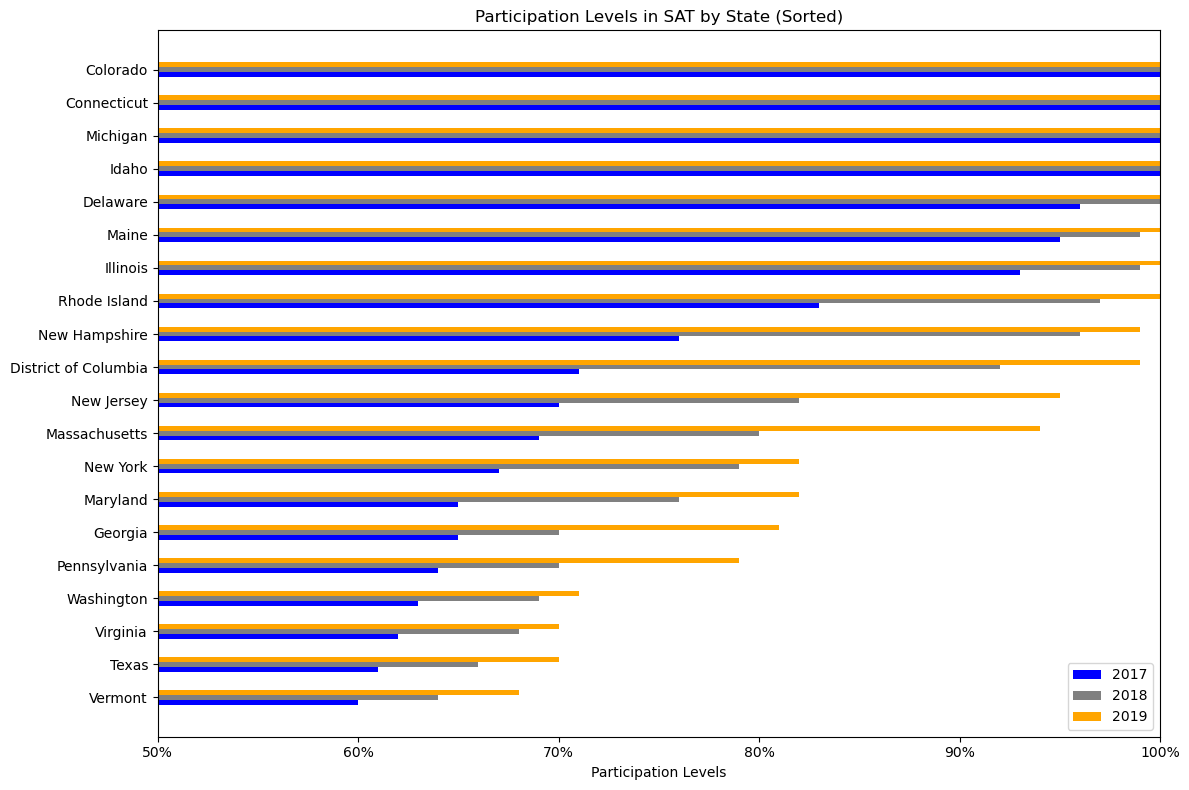

In [529]:
# Bar Graphs showing Participation Levels increased from 2017 - 2019 in 20 states
# Sort the DataFrames by participation in ascending order
sat17_edited_sorted = sat17_edited.sort_values(by='participation', ascending=True)
sat18_edited_sorted = sat18_edited.sort_values(by='participation', ascending=True)
sat19_edited_sorted = sat19_edited.sort_values(by='participation', ascending=True)

# Get the top 20 states for each year
top_states_2017 = sat17_edited_sorted['state'].tail(20)
top_states_2018 = sat18_edited_sorted['state'].tail(20)
top_states_2019 = sat19_edited_sorted['state'].tail(20)

# Get the corresponding participation values for each year
participation_2017 = sat17_edited_sorted['participation'].tail(20)
participation_2018 = sat18_edited_sorted['participation'].tail(20)
participation_2019 = sat19_edited_sorted['participation'].tail(20)

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Set the bar width
bar_width = 0.15

# Set the positions of the bars on the x-axis
bar_positions_2017 = np.arange(len(top_states_2017))
bar_positions_2018 = bar_positions_2017 + bar_width
bar_positions_2019 = bar_positions_2018 + bar_width

# Plot the bars for each year
ax.barh(bar_positions_2017, participation_2017, bar_width, label='2017', color='blue')
ax.barh(bar_positions_2018, participation_2018, bar_width, label='2018', color='gray')
ax.barh(bar_positions_2019, participation_2019, bar_width, label='2019', color='orange')

# Set the y-axis ticks and labels
ax.set_yticks(bar_positions_2018)
ax.set_yticklabels(top_states_2018)

# Set labels and title
ax.set_xlabel('Participation Levels')
ax.set_xlim(0.5, 1)
ax.set_title('Participation Levels in SAT by State (Sorted)')
# Turning into dec to % for x axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.0%}'))

# Add a legend
ax.legend()

plt.tight_layout()
plt.show()

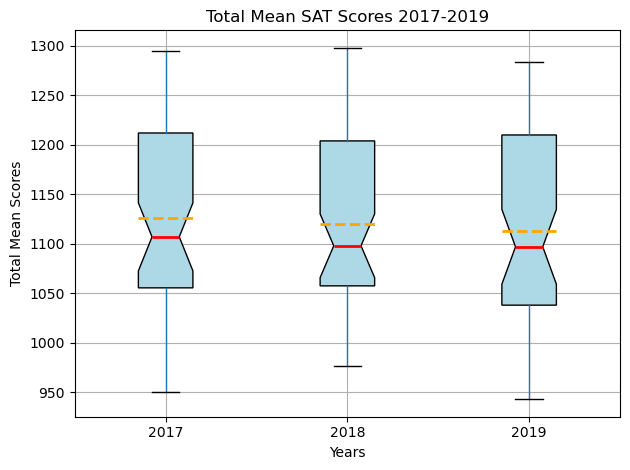

In [530]:
# Box Chart showing Total Mean SAT Scores decreased from 2017 - 2019
boxplot = sat17_18_19_part_total.boxplot(column=['2017_SAT_Total','2018_SAT_Total','2019_SAT_Total'], 
                                         notch = True, showmeans = True, meanline = True, 
                                         medianprops = dict(color = "red", linewidth = 2),
                                         meanprops = dict(color = "orange", linewidth = 2),
                                         patch_artist = True, boxprops = dict(facecolor = "lightblue"),
                                         # whiskerprops = dict(color = "black", linewidth = 2)
                                        )

# 95% confidence about median interval marked via notches `median +/- 1.96 std_err`
# Dashed line is Mean
# Solid line is Median
plt.xlabel('Years')
plt.xticks([1,2,3], ['2017', '2018', '2019'])
plt.ylabel('Total Mean Scores')
plt.title('Total Mean SAT Scores 2017-2019')   
plt.tight_layout()

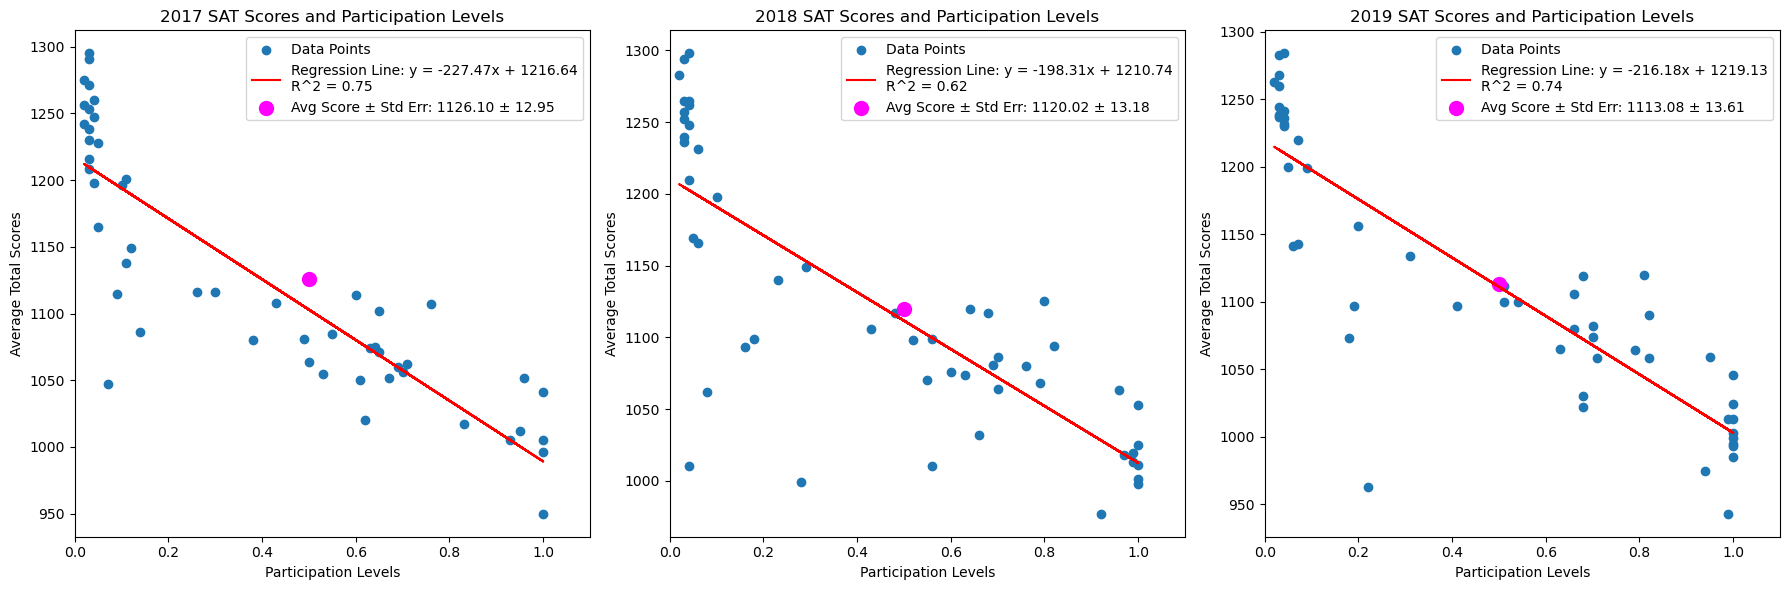

In [531]:
# Subplots showing linear regression line and negative correlation between participation and total scores
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Function to plot scatter, regression line, mean, and std_err
def scatter_with_regression(ax, x, y, title):
    ax.scatter(x, y, label='Data Points')
    
    # Calculate and plot regression line
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    line = f'Regression Line: y = {slope:.2f}x + {intercept:.2f}\nR^2 = {r_value**2:.2f}'
    ax.plot(x, intercept + slope * x, color='red', label=line)
    
    # Calculate and plot average score
    mean_value = np.mean(y)
    std_err_value = np.std(y, ddof=1) / np.sqrt(len(y))
    ax.scatter([0.5], [mean_value], color='magenta', marker='o', s=100, label=f'Avg Score ± Std Err: {mean_value:.2f} \u00B1 {std_err_value:.2f}')
    
    ax.set_title(title)
    ax.set_xlim(0, 1.1)  
    ax.set_xlabel('Participation Levels')
    ax.set_ylabel('Average Total Scores')
    ax.legend()

# Scatter plot for 2017
scatter_with_regression(axes[0], sat17_18_19_part_total['2017_SAT_Participation'], sat17_18_19_part_total['2017_SAT_Total'], '2017 SAT Scores and Participation Levels')

# Scatter plot for 2018
scatter_with_regression(axes[1], sat17_18_19_part_total['2018_SAT_Participation'], sat17_18_19_part_total['2018_SAT_Total'], '2018 SAT Scores and Participation Levels')

# Scatter plot for 2019
scatter_with_regression(axes[2], sat17_18_19_part_total['2019_SAT_Participation'], sat17_18_19_part_total['2019_SAT_Total'], '2019 SAT Scores and Participation Levels')

plt.tight_layout()

plt.show()

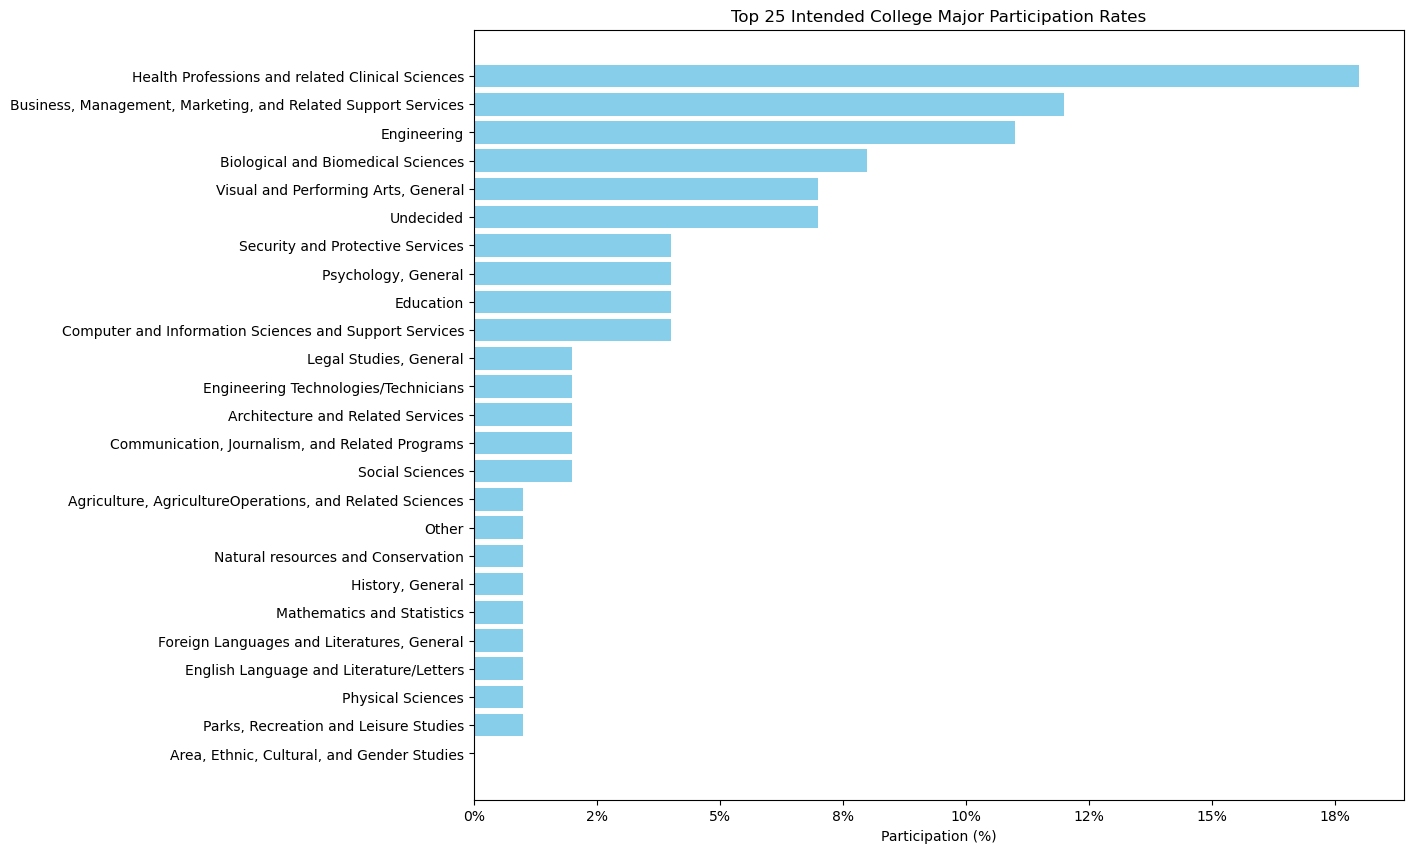

In [532]:
# Participation rates of intended majors, top 25
data = sat19maj_edited[['intendedcollegemajor', 'percent']].sort_values(by='percent', ascending=False)

plt.figure(figsize=(12, 10))
plt.barh(data['intendedcollegemajor'].head(25), data['percent'].head(25), color='skyblue')
plt.xlabel('Participation (%)')  # Adjust x-axis label
plt.title('Top 25 Intended College Major Participation Rates')
plt.gca().invert_yaxis()

plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.0%}'))

plt.show()

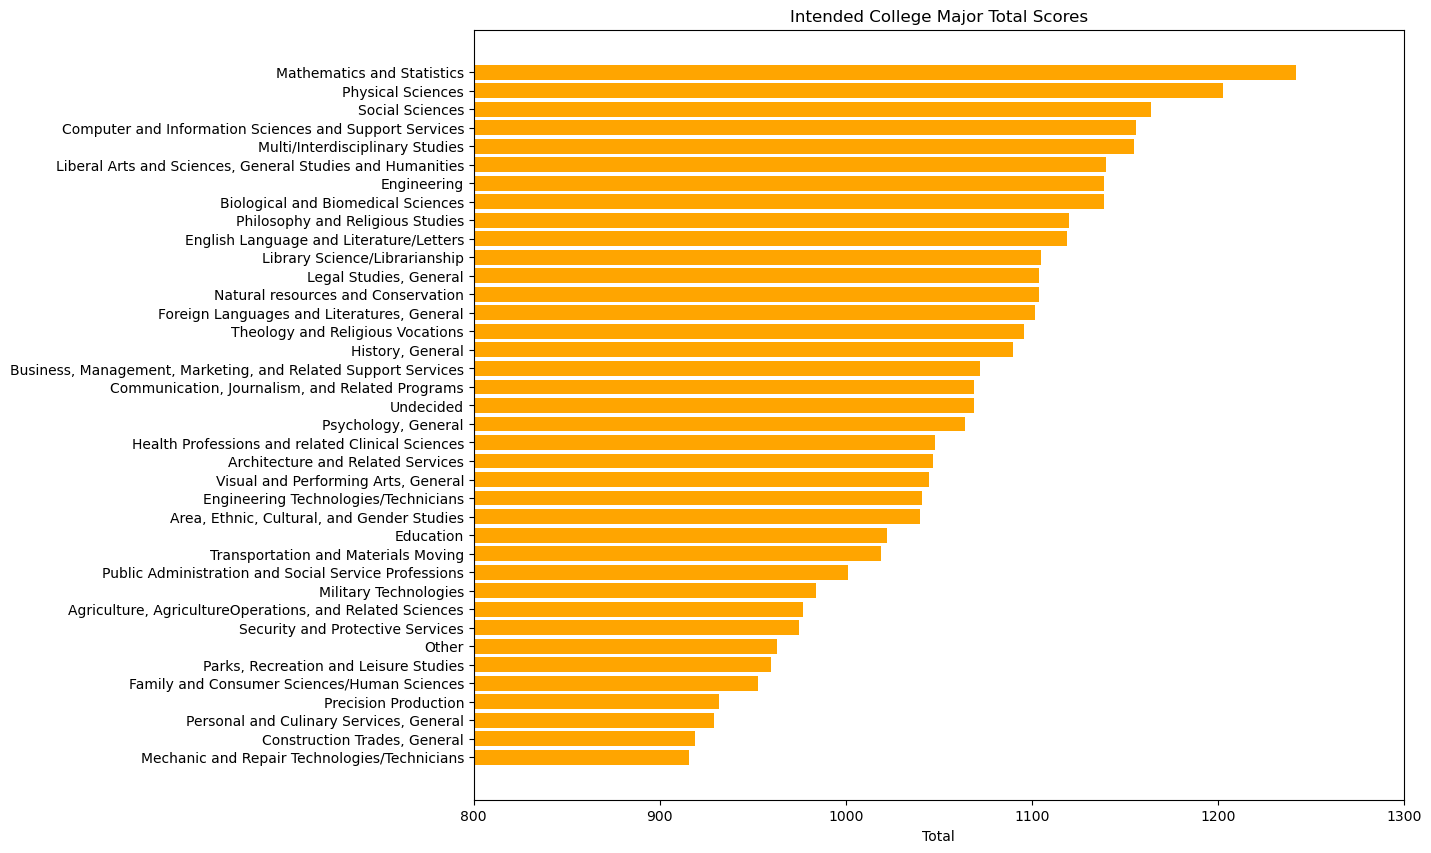

In [533]:
# Total scores of intended majors
sat19maj_edited[['intendedcollegemajor','total']].sort_values(by= 'total',ascending=False);

data_total = sat19maj_edited[['intendedcollegemajor', 'total']].sort_values(by='total', ascending=False)

plt.figure(figsize=(12, 10))
plt.barh(data_total['intendedcollegemajor'], data_total['total'], color='orange')
plt.xlabel('Total')
plt.xlim(800,1300)
plt.title('Intended College Major Total Scores')
plt.gca().invert_yaxis()
plt.show()

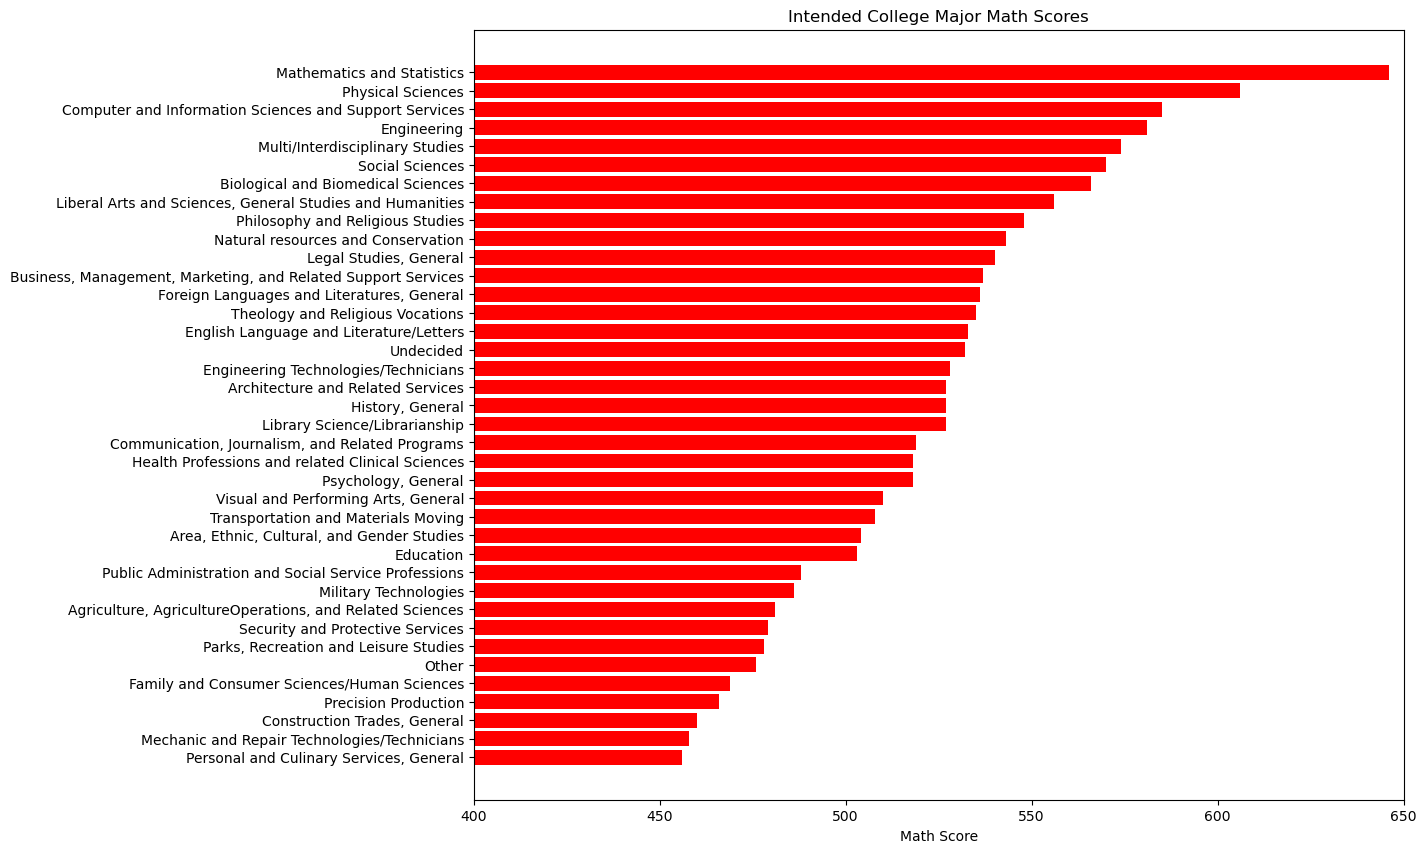

In [534]:
# Math scores of intended majors

sat19maj_edited[['intendedcollegemajor','math']].sort_values(by= 'math',ascending=False);

data_total = sat19maj_edited[['intendedcollegemajor', 'math']].sort_values(by='math', ascending=False)

plt.figure(figsize=(12, 10))
plt.barh(data_total['intendedcollegemajor'], data_total['math'], color='red')
plt.xlabel('Math Score')
plt.xlim(400,650)
plt.title('Intended College Major Math Scores')
plt.gca().invert_yaxis()
plt.show()

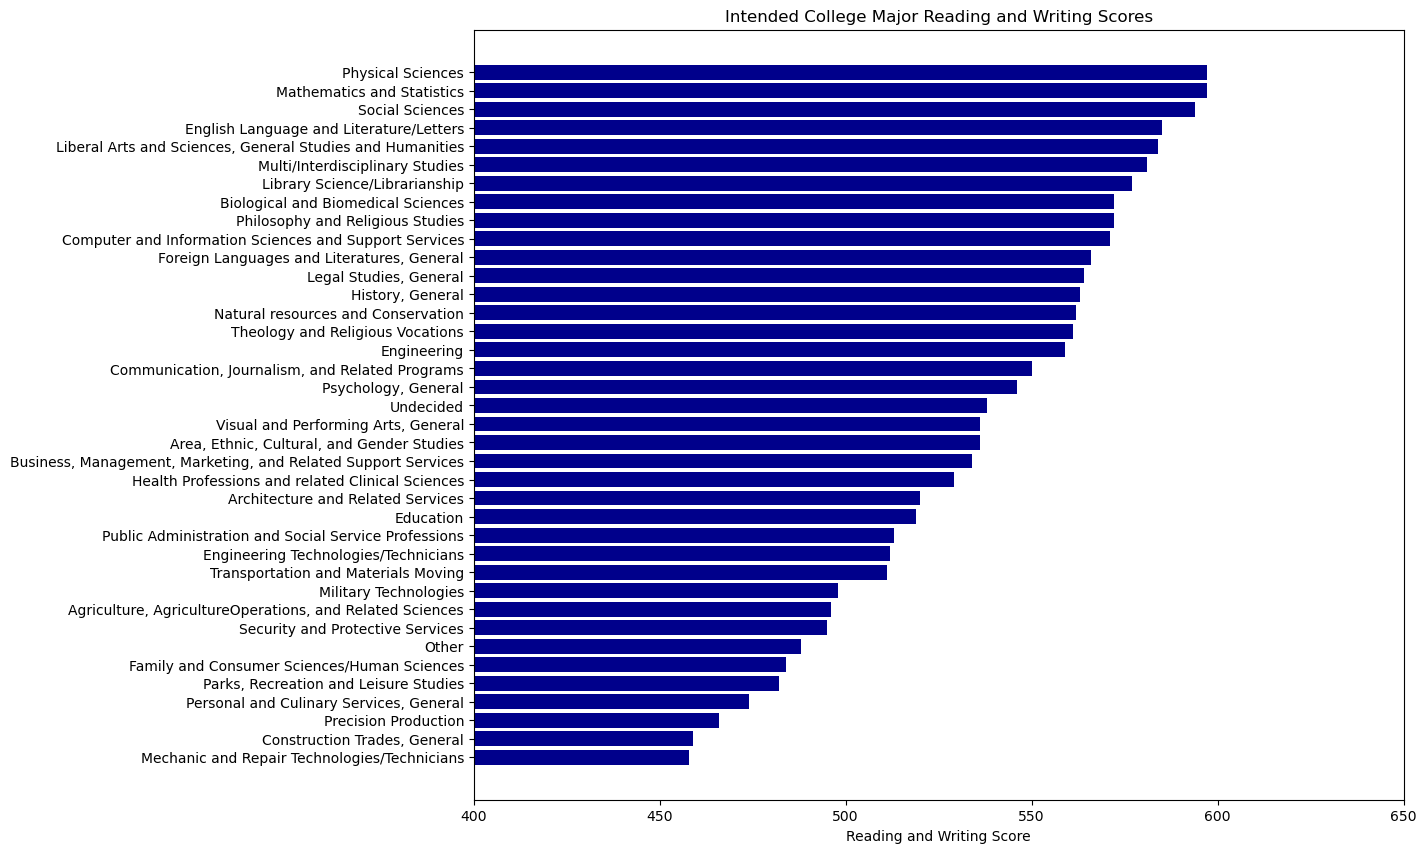

In [535]:
# Reading and Writing scores of intended majors

sat19maj_edited[['intendedcollegemajor','readingwriting']].sort_values(by= 'readingwriting',ascending=False);

data_total = sat19maj_edited[['intendedcollegemajor', 'readingwriting']].sort_values(by='readingwriting', ascending=False)

plt.figure(figsize=(12, 10))
plt.barh(data_total['intendedcollegemajor'], data_total['readingwriting'], color='darkblue')
plt.xlabel('Reading and Writing Score')
plt.xlim(400,650)
plt.title('Intended College Major Reading and Writing Scores')
plt.gca().invert_yaxis()
plt.show()

## Conclusions and Recommendations

We examined trends in SAT scores and participation rates from 2017 through 2019 and also looked at trends in intended major SAT scores and participation in 2019. We found that, although participation increased in these years, SAT scores declined slightly as a result of new test takers entering the pool, i.e. participation did not lead to preparedness and these variables were negatively correlated. 

Intended majors performed better in their areas of expertise compared with those not in that area. Those in the sciences performed better overall, most likely due to objectivity of mathematics questions / multi-interpretability of reading and writing questions, as well as cultural factors and disparities in resources. 